<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Flipping-a-coin" data-toc-modified-id="Flipping-a-coin-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Flipping a coin</a></span></li><li><span><a href="#Histograms-and-Probability-Density-Functions" data-toc-modified-id="Histograms-and-Probability-Density-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms and Probability Density Functions</a></span></li><li><span><a href="#Mean-of-Random-Variables" data-toc-modified-id="Mean-of-Random-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mean of Random Variables</a></span></li><li><span><a href="#The-Normal-Distribution" data-toc-modified-id="The-Normal-Distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The Normal Distribution</a></span></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Central Limit Theorem</a></span></li><li><span><a href="#Monte-Carlo-Experiments" data-toc-modified-id="Monte-Carlo-Experiments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Monte Carlo Experiments</a></span><ul class="toc-item"><li><span><a href="#Calculating-$\pi$" data-toc-modified-id="Calculating-$\pi$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculating $\pi$</a></span></li><li><span><a href="#Calculating-Probability" data-toc-modified-id="Calculating-Probability-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Calculating Probability</a></span></li></ul></li></ul></div>

# INF-SR: Random Variables (Programming)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Flipping a coin

We flip a coin where $𝖯(\text{"tails"})=p$ and $p$ is not necessarily equal to $0.5$ (i.e. not necessarily a fair coin). We repeat the experiment of flipping the coin $n$ times and let $X$ be the random variable that counts how many times $k$ we find “tails” up. The p.m.f. $p_X(k)$ gives the probability that we find $k$-times 'heads' up in a series of $n$ coint tosses.

The formula for $p_X(k)$ can be found in the lecture notes. In the cell below implement the `p_X` function. **You cannot use the `scipy.stats.binom` function** or any other function that implements this for you. Only the factorial function from scipy can be used.

In [109]:
from scipy.special import factorial

def p_X(k, n, p):
    return factorial(n) / (factorial(k) * factorial(n - k)) * p**k * (1 - p)**(n - k)

In the cell below write the code to plot the DISCRETE probability mass function $p_X(k)$ for $n=20$ and $p\in\{0.25, 0.50, 0.75\}$. Create the plot, including a `plt.show()` call, in the function `plot_binom_discrete(n, p)`. This function should also return the x-axis values `ks` and y-axis values `ps` used for the plot. 

Make sure `ks` contains precisely the values for which the probability is positive.

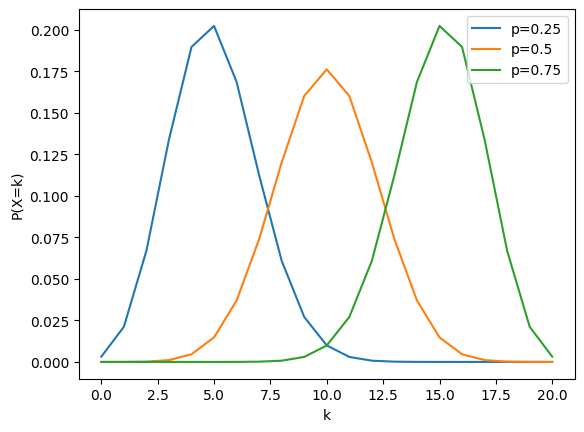

In [110]:
def plot_binom_discrete(n, p):
    ks = np.arange(0, n+1)
    ps = np.zeros((len(p), len(ks)))
    for i, p_i in enumerate(p):
        ps[i] = [p_X(k, n, p_i) for k in ks]
        plt.plot(ks, ps[i], label=f'p={p_i}')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('P(X=k)')
    plt.show()

    return ks, ps
  
# Call the function here to plot.
n = 20
p = [0.25, 0.5, 0.75]
ks, ps = plot_binom_discrete(n, p)


In the next cell perform some numerical tests to 'prove' the equality (for different combinations of $n$ and $p$).

In [111]:
# Perform some numerical tests to 'prove' the equality (for different combinations of $n$ and $p$).

n = 2
p = 0.5
k = 1
print(f'p_X({k}, {n}, {p}) = {p_X(k, n, p)}')

n = 4
p = 0.5
k = 1
print(f'p_X({k}, {n}, {p}) = {p_X(k, n, p)}')

n = 10
p = 0.75
k = 7.5
print(f'p_X({k}, {n}, {p}) = {p_X(k, n, p)}')

n = 20
p = 0.25
k = 5
print(f'p_X({k}, {n}, {p}) = {p_X(k, n, p)}')

p_X(1, 2, 0.5) = 0.5
p_X(1, 4, 0.5) = 0.25
p_X(7.5, 10, 0.75) = 0.28106207326047994
p_X(5, 20, 0.25) = 0.2023311518569244


## Histograms and Probability Density Functions

Given a sample of $m$ values from a continuous random variable $X$ it is easy to draw the histogram of these values.

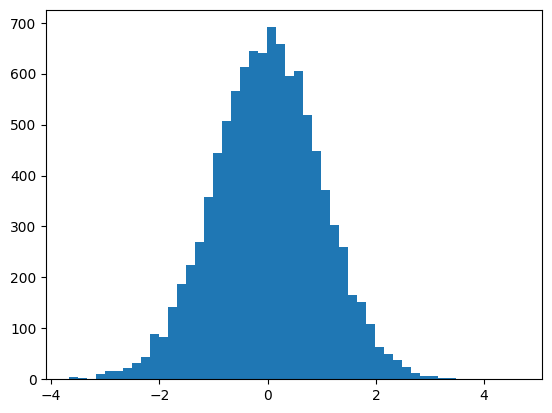

In [112]:
sample = np.random.normal(size=10000)
h, be = np.histogram(sample, bins=50)
plt.bar(be[:-1], h, width=be[1]-be[0], align='edge');

The more values in your sample, the better the shape of the histogram resembles the probability distribution of the standard normal distribution. But it resembles **only the shape** not the numerical values. When we plot the pdf we get:

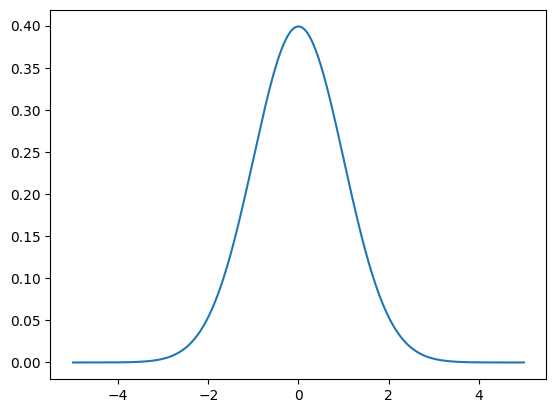

In [113]:
def fStdNormal(x):
    return 1/np.sqrt(2*np.pi) * np.exp( -x**2 / 2 )
x = np.linspace(-5, 5, 1000)
plt.plot(x, fStdNormal(x));

Note that the scale on the vertical axis is totally different. It is your task to normalize a histogram of a distribution (not necessarily the normal distribution) such that its values do approximate the pdf of the distribution. More formally, let $f_X$ be the pdf of the RV $X$. Let ``h`` be the N bins histogram array of shape ``(N,)`` and let ``be`` be the bin edges array. The array of midpoints ``xx`` of the bins is made with ``xx = be[:-1]+0.5*diff(be)``. The goal is now to normalize ``h`` into array ``pdf`` such that ``pdf[i]`` approximates $f_X(x[i])$.

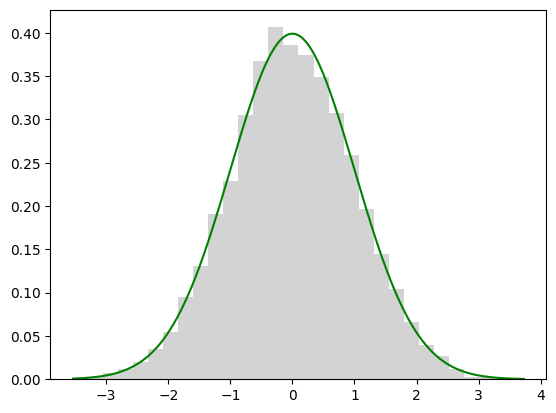

In [114]:
def histogram2pdf(h, be):
    pdf = h / np.sum(h) / (be[1] - be[0])
    return pdf

sample = np.random.normal(size=10000)
h, be = np.histogram(sample, bins=30)

xx = np.linspace(be[0],be[-1],1000)
plt.bar(be[:-1], histogram2pdf(h, be), width=be[1]-be[0], color='lightgray', align='edge');
plt.plot(xx, fStdNormal(xx), 'g');

## Mean of Random Variables

Consider the random variable $X\sim \text{Uniform}(-1,1)$

In Python you can draw 10000 samples from this distribution with the function `np.random.uniform(low=-1,high=1,size=10000)`. Doing this and making a normalized histogram leads to:

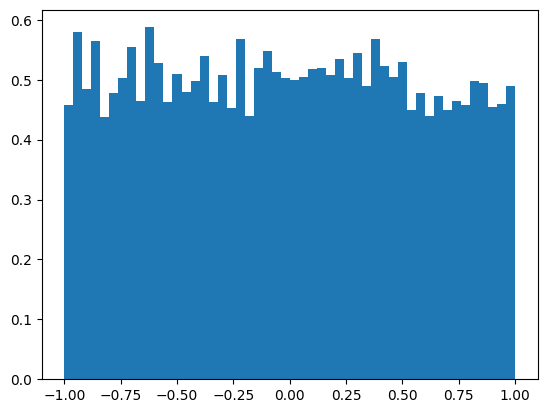

In [115]:
sample = np.random.uniform(low=-1, high=+1, size=10000)
h, be = np.histogram(sample, bins=50)

# Now normalize the histogram before plotting it.
plt.bar(be[:-1], histogram2pdf(h, be), width=be[1]-be[0], align='edge');

Now we define the random variable $M_2=(X_1+X_2)/2$. Plot a histogram (with 50 bins) of the 10000 $M_2$ values. Normalize the histogram to approximate the pdf of $M_2$.

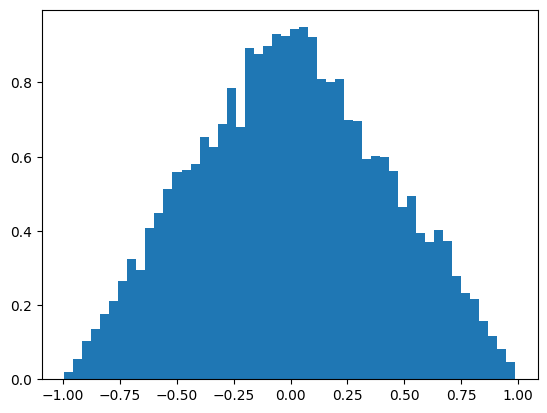

In [116]:
np.random.seed(98394829)
sampleXi = np.random.uniform(low=-1, high=+1, size=(10000,2))
sampleMi = np.mean(sampleXi, axis=1)

h, be = np.histogram(sampleMi, bins=50)
plt.bar(be[:-1], histogram2pdf(h, be), width=be[1]-be[0], align='edge');

Now redo the plots for $M_n$ with $n=1, 2, 3, 5, 10, 100$. Write your solution in the `plot_M_n(n)` function, which should construct the plot and call `plt.show()`. Then it should return the x-axis values `xs` and y-axis values `ps` used in the plot.

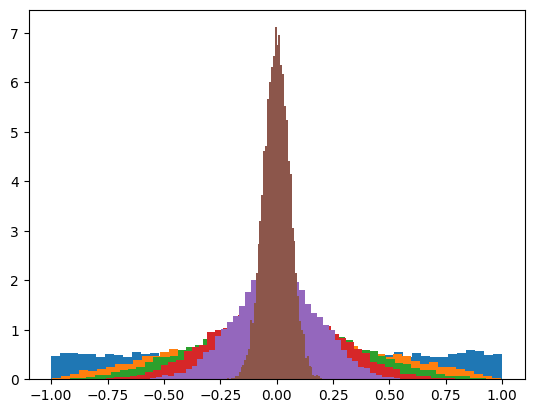

In [117]:
def plot_M_n(n):
    np.random.seed(98394829)
    
    sampleXi = [np.random.uniform(low=-1, high=+1, size=(10000,n_i)) for n_i in n]
    sampleMi = [np.mean(sampleXi_i, axis=1) for sampleXi_i in sampleXi]

    ps = []
    for sampleMi_i in sampleMi:
        h, be = np.histogram(sampleMi_i, bins=50)
        ps.append(histogram2pdf(h, be))
        plt.bar(be[:-1], histogram2pdf(h, be), width=be[1]-be[0], align='edge')
    plt.show()

    return be, ps

# Call the function here for the different values of n.
n = [1,2,3,5,10,100]

xs,ps = plot_M_n(n)

Can you make an hyphothesis for the pdf of $M_{2}$? I.e. can you 'guess' the formula for this pdf? And what about $M_{100}$? We will come back to this question in a subsequent exercise. (these questions won't be graded...)

## The Normal Distribution

You have already written the code for the pdf of the standard normal distribution. Make sure the function ``fStdNormal`` is working correctly at this point.

Now define the function ``fNormal`` for a normal distribution with mean $\mu$ and standard deviation $\sigma$. You have to use your ``fStdNormal`` function. Refer to the  section in the lecture notes on [Scaled and Shifted Distributions](https://staff.fnwi.uva.nl/r.vandenboomgaard/MachineLearning/LectureNotes/ProbabilityStatistics/rvCalculations.html#scaled-and-shifted-distributions).

In [118]:
def fNormal(x, mu, sigma):
    #. Your solution here ...


SyntaxError: incomplete input (2936571090.py, line 2)

In [ ]:
x = np.linspace(-5, 15, 1000)
f = fNormal(x, 5, 3)
plt.plot(x, f);

The cumulative distribution function for the standard normal distribution can not be written down in an analytical expression. We have to use the `scipy.special.erf` function (which numerically approximates the cumulative distribution function). Without proof we state that $F_X(x)$ can be defined as:
$$F_X(x) = \tfrac{1}{2} \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)$$

In [ ]:
import scipy
def FStdNormal(x):
    return 0.5 * (1 + scipy.special.erf(x/np.sqrt(2)))

x = np.linspace(-4,4,1000);
plt.plot(x, FStdNormal(x));

Use the ``FStdNormal`` function to write the function ``FNormal(x, mu, sigma)`` for the cumulative distribution of a normal distribution with expectation $\mu$ and variance $\sigma^2$. Again we refer you to the  section in the lecture notes on [Scaled and Shifted Distributions](https://staff.fnwi.uva.nl/r.vandenboomgaard/MachineLearning/LectureNotes/ProbabilityStatistics/rvCalculations.html#scaled-and-shifted-distributions).

In [ ]:
def FNormal(x, mu, sigma):
    #. Your solution here ...
    
x = np.linspace(-5, 20, 1000)
plt.plot(x, FNormal(x, 10, 3));

We can draw a sample from the normal distribution using the function `numpy.random.normal(loc=mu, scale=sigma, size=None)`. Use this function to draw 10000 numbers from a normal distribution with $\mu=3$ and $\sigma=2$. Make and draw a histogram for all these numbers and scale it to be an approximation of the pdf. Also plot the pdf on top of the histogram.

In [ ]:
sample = np.random.normal(loc=3, scale=2, size=10000)

#. Your solution here ...

## Central Limit Theorem

In a previous exercise in this notebook you have calculated the mean of $n$ observations from a uniform distribution. The RV corresponding with this random experiment was called $M_n$. In that previous exercise you have plotted the histogram of a sample of $M_n$ (for several values of $n$).

Note that
$$M_n = \frac{1}{n}\sum_{i=1}^{n} X_i$$
where the $X_i\sim\text{Uniform}(-1,1)$ are iid.
In a homework ANS exercise you had to prove that $E(M_n) = E(X)$ and that $\text{Var}(M_n) = \text{Var}(X)/n$. In that same exercise you have calculated the expectation and variance of a uniform distribution.

With all this knowledge you can calculate and plot the pdf of a normal distribution with $\mu=E(M_n)$ and $\sigma^2 = \text{Var}(M_n)$. So below in `plot_M_n_with_pdf(n)`, make the plots again of the histograms of the $M_n$ samples for all values of $n$ (this is a simple copy and paste). Then overlay the bar plot for each $n$ with the normal distribution pdf. 

Let the function return `xs_hist`, `ps_hist`, `xs_pdf` and `ps_pdf`, where the first two are the x and y values used to plot the histograms, and the last two are the x and y values used to plot the pdf.
Use a `np.linspace` with logical start/stop values and `num=1000` to define `xs_pdf`. Don't forget to align the bar plot for the histogram to `align='edge'`.

If all is well you will observe that for $n=1$ the normal pdf is nowhere near the uniform pdf but that for $n$ getting increasingly larger the histogram of the sample of $M_n$ is getting closer and closer to the normal pdf (with appropriate mean and standard deviation of course). This illustrates what is called **the central limit theorem**.

In [ ]:
def plot_M_n_with_pdf(n):
    np.random.seed(98394829)
    
    #. Your solution here ...

    return xs_hist, ps_hist, xs_pdf, xs_hist

# Call the function here for the different values of n.
#. Your solution here ...

## Monte Carlo Experiments

<font color='red'>
    This entire section until the end of the notebook does not count towards the final grade of this labexercise. There is some autograding done but only for your information.
    </font>

To quote Wikipedia: "Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle."

### Calculating $\pi$

Suppose we want to calculate a numerical value of $\pi$. Perhaps the most inaccurate way to do so is the following random experiment. Consider the two RV's $X$ and $Y$ that iid: $X, Y \sim \text{Uniform}(-1, +1)$. Every drawing gives a point $(X,Y)$ within the square. Every position in the square is equally probable.

Calculating the proportion of points that fall in the disk with radius 1 centered at the origin and the total number of points within the square  will give an approximation of $\pi$. Extend the following code in such a way that the sample set is separated into a set of points within the unit circle and a set of points outside the unit circle. Plot the two different point sets in different colors and give the figure a title with ``plt.title(r'$\pi\approx %5.4f$' % hat_pi);`` where ``hat_pi`` is the estimation of $\pi$.

In [ ]:
def monte_carlo_pi(samples):
    sampleX12 = np.random.uniform(low=-1, high=+1, size=(samples, 2))
    X = sampleX12[:,0]
    Y = sampleX12[:,1]
    plt.scatter(X, Y, marker='.')
    plt.axis('equal')
    
    #. Your solution here ...

    return hat_pi

monte_carlo_pi(2000)

### Calculating Probability

Let rv $X$ be distributed with pdf $f_X$. We are given a function to get a sample of this distribution. Write the code to calculate (estimate) the probability $a\leq X \leq b$ with a Monte Carlo experiment. Calculate the probabilities $p_1=P(-1\leq X \leq 1)$, $p_2=P(-2\leq X \leq 2)$ and $p_3=P(-3\leq X \leq 3)$ in case $X\sim\text{Normal}(0,1)$. 

In [ ]:
def estimate_probability(sample, a, b):
    #. Your solution here ...

np.random.seed(1)
sample = np.random.normal(size=100000)

# Calculate the probabilities p1 = P(-1 <= X <= 1), p2 = P(-2 <= X <= 2) and p3 = P(-3 <= X <= 3)
#. Your solution here ...

print(p1, p2, p3)

But now consider two iid standard normally distributed random variables $X$ and $Y$. 

In [ ]:
np.random.seed(1)
sampleX = np.random.normal(size=1000)
sampleY = np.random.normal(size=1000)
plt.scatter(sampleX, sampleY, marker='.')
plt.axis('equal');

What is the probability $P((-1\leq X \leq 1) \cap (-1\leq Y \leq 1))$? First give a mathematical calculation in the next cell:

#. Your solution here ...

And in the next cell a computational 'proof':

In [ ]:
def estimate_2d_p(sampleX, sampleY):
    # Estimate $P((-1\leq X \leq 1) \cap (-1\leq Y \leq 1))$.
    #. Your solution here ...

from IPython.display import display, Math

p = estimate_2d_p(sampleX, sampleY)
display(Math(r'$$P((-1\leq X \leq 1) \cap (-1\leq Y \leq 1)) = %5.2f$$' % p))

Observe that increasing the dimension of feature space will decrease the probability of finding a value in a 1 standard deviation box around the mean. And it decreases quite rapidly! This is one of the ways the **curse of dimensionality shows up**.